# Assignment 4

### CHATGPT DISCLAIMER

Used chatgpt to make a list of ideas on what to do to process tweets

## 1

### A

In [43]:
import pandas as pd

# Load the dataset
file_path = "./data/msft.csv"
df = pd.read_csv(file_path)

# Apply equal width discretization to the "Close" column with 5 bins
num_bins = 5
df['Close_Discretized'] = pd.cut(df['Close'], bins=num_bins)

# Display the first 5 discretized values
print(df['Close_Discretized'].head())

0    (53.926, 63.62]
1    (53.926, 63.62]
2    (53.926, 63.62]
3    (53.926, 63.62]
4    (53.926, 63.62]
Name: Close_Discretized, dtype: category
Categories (5, interval[float64, right]): [(15.102, 24.844] < (24.844, 34.538] < (34.538, 44.232] < (44.232, 53.926] < (53.926, 63.62]]


### B

In [44]:
# Calculate quantiles for equal frequency discretization
quantiles = pd.qcut(df['Close'], q=[0, 0.2, 0.4, 0.6, 0.8, 1.0], duplicates='drop')

# Apply the quantiles to create the discretized column
df['Close_Discretized'] = pd.cut(df['Close'], bins=quantiles.cat.categories)

# Display the first 5 discretized values
print(df['Close_Discretized'].head())

0    (44.4, 63.62]
1    (44.4, 63.62]
2    (44.4, 63.62]
3    (44.4, 63.62]
4    (44.4, 63.62]
Name: Close_Discretized, dtype: category
Categories (5, interval[float64, right]): [(15.149000000000001, 25.89] < (25.89, 28.678] < (28.678, 31.854] < (31.854, 44.4] < (44.4, 63.62]]


## 2

In [45]:
import numpy as np

# Load the dataset
file_path = "./data/vehicles.csv"
# Load the dataset skipping the first row (header)
vehicles_df = pd.read_csv(file_path, header=0)

# Filter only "van" and "bus" classes
vehicles_df = vehicles_df[(vehicles_df["class"] == "van") | (vehicles_df["class"] == "bus")]
vehicles_df["class"] = vehicles_df["class"].replace(["van"], 0)
vehicles_df["class"] = vehicles_df["class"].replace(["bus"], 1)

def calculate_entropy(y):
    unique_labels, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def find_best_split(df, feature, class_column='class'):
    unique_values = df[feature].unique()
    unique_values.sort()

    best_split_point = None
    best_entropy = float('inf')

    for i in range(len(unique_values) - 1):
        split_point = (unique_values[i] + unique_values[i + 1]) / 2
        left_mask = df[feature] <= split_point
        right_mask = ~left_mask

        left_entropy = calculate_entropy(df[left_mask][class_column])
        right_entropy = calculate_entropy(df[right_mask][class_column])

        total_entropy = (len(df[left_mask]) * left_entropy + len(df[right_mask]) * right_entropy) / len(df)

        if total_entropy < best_entropy:
            best_entropy = total_entropy
            best_split_point = split_point

    return best_split_point, best_entropy

def discretize_recursive(df, features):
    for feature in features:
        print(f"\nFeature: {feature}")
        split_point, entropy = find_best_split(df, feature)

        print(f"Discretized Ranges: <= {split_point}, > {split_point}")
        print(f"Final Entropy: {entropy}")

        df[feature] = np.where(df[feature] <= split_point, f'<= {split_point}', f'> {split_point}')

# Specify features to discretize (excluding the 'class' column)
features_to_discretize = vehicles_df.columns.difference(['class'])

# Perform recursive discretization
discretize_recursive(vehicles_df, features_to_discretize)


Feature: circularity
Discretized Ranges: <= 50.5, > 50.5
Final Entropy: 0.9123564854451003

Feature: compactness
Discretized Ranges: <= 98.5, > 98.5
Final Entropy: 0.9006384628775929

Feature: distance_circularity
Discretized Ranges: <= 92.5, > 92.5
Final Entropy: 0.9225019096999798

Feature: elongatedness
Discretized Ranges: <= 46.5, > 46.5
Final Entropy: 0.695108797965016

Feature: gyrationradius
Discretized Ranges: <= 188.5, > 188.5
Final Entropy: 0.9027996319846472

Feature: hollows_ratio
Discretized Ranges: <= 189.5, > 189.5
Final Entropy: 0.9039392810777032

Feature: lengthrectangular
Discretized Ranges: <= 167.5, > 167.5
Final Entropy: 0.9744644319183258

Feature: majorkurtosis
Discretized Ranges: <= 181.5, > 181.5
Final Entropy: 0.928548210630629

Feature: majorskewness
Discretized Ranges: <= 64.5, > 64.5
Final Entropy: 0.9201571722393916

Feature: majorvariance
Discretized Ranges: <= 165.5, > 165.5
Final Entropy: 0.718834477909226

Feature: max_length_aspect_ratio
Discretized

## 3

In [46]:
def compute_mean_absolute_deviation(df):
    # Convert class labels to numeric
    class_mapping = {"van": 0, "bus": 1, "saab": 2, "opel": 3}
    df["class"] = df["class"].map(class_mapping)

    # Compute Mean Absolute Deviation (MAD) for each feature
    mad_values = df.apply(lambda x: (x - x.median()).abs().median())

    # Sort features based on MAD in descending order
    sorted_features_mad = mad_values.sort_values(ascending=False)

    # Print sorted features based on MAD
    print("Features sorted by Mean Absolute Deviation:")
    print(sorted_features_mad)

def remove_highly_correlated_features(df, threshold=0.9):
    # Compute correlation matrix
    correlation_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    # Find features with correlation above the threshold
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    # Print features to be removed
    print(f"\nFeatures to be removed based on correlation above {threshold}:")
    print(to_drop)

    # Drop highly correlated features
    df_filtered = df.drop(columns=to_drop)

    return df_filtered

# Load the dataset
file_path = './data/vehicles.csv'
vehicles_df = pd.read_csv(file_path)

# Compute Mean Absolute Deviation
compute_mean_absolute_deviation(vehicles_df)

# Remove highly correlated features
filtered_df = remove_highly_correlated_features(vehicles_df)

# Display the resulting DataFrame
print("\nDataFrame after removing highly correlated features:")
print(filtered_df)

Features sorted by Mean Absolute Deviation:
minorvariance              94.5
radius_ratio               27.0
gyrationradius             24.5
scatter_ratio              20.0
majorvariance              19.5
distance_circularity       12.0
lengthrectangular          11.0
minorkurtosis               6.0
compactness                 6.0
elongatedness               6.0
circularity                 5.0
hollows_ratio               5.0
majorskewness               4.5
minorskewness               4.0
pr_axis_aspect_ratio        4.0
majorkurtosis               4.0
pr_axisrectangular          2.0
max_length_aspect_ratio     2.0
class                       1.0
dtype: float64

Features to be removed based on correlation above 0.9:
['scatter_ratio', 'elongatedness', 'pr_axisrectangular', 'lengthrectangular', 'majorvariance', 'minorvariance', 'gyrationradius']

DataFrame after removing highly correlated features:
     compactness  circularity  distance_circularity  radius_ratio  \
0             95        

## 4

### A

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

vehicles_df = pd.read_csv(file_path)

# Convert class labels to numeric
class_mapping = {"van": 0, "bus": 1, "saab": 2, "opel": 3}
vehicles_df["class"] = vehicles_df["class"].map(class_mapping)

# Separate features and labels
X = vehicles_df.drop(columns=['class'])
y = vehicles_df['class']

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X_standardized)

# Create a DataFrame with principal components
pc_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
pc_df = pd.DataFrame(data=principal_components, columns=pc_columns)

# Display the principal components DataFrame
print("Principal Components:")
print(pc_df.head())

# Percentage of variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

Principal Components:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.544291 -0.806329  0.356535 -1.645952  0.897445  0.556681 -0.060381   
1  3.664223 -0.922105  0.059968  0.444837  0.789021 -0.149480 -1.348124   
2  3.788722 -1.937588 -0.106526  2.435800  0.418041  0.355490  0.553890   
3 -1.062921 -4.028445 -0.120206 -1.940805  0.157198  0.260954  0.542114   
4  3.989150  1.178758 -0.898485  0.174144  1.478310 -0.786526 -0.570053   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.575771 -0.026833 -0.057672  0.081963  0.205111 -0.021366  0.104711   
1  0.448645  0.113455 -0.314922  0.022146  0.104553  0.132771  0.161079   
2  0.226956 -0.053726  0.264556  0.055300  0.028697  0.081891  0.325239   
3 -0.443677  0.393767  0.248347 -0.066988 -0.054382 -0.103389  0.009887   
4  0.273657  0.531122  0.435342  0.157833  0.097256  0.020937 -0.229531   

       PC15      PC16      PC17      PC18  
0  0.059293 -0.054826  0.031268 

### B

In [48]:
def find_pcs_for_variance(principal_components, target_variance):
    # Calculate the cumulative explained variance
    cumulative_explained_variance = np.cumsum(principal_components.explained_variance_ratio_)

    # Find the number of PCs needed to capture the desired variance
    num_pcs = np.argmax(cumulative_explained_variance >= target_variance) + 1

    return num_pcs

# Example usage for 90% and 99% variance
target_variance_90 = 0.9
target_variance_99 = 0.99

num_pcs_90 = find_pcs_for_variance(pca, target_variance_90)
num_pcs_99 = find_pcs_for_variance(pca, target_variance_99)

print(f"Number of PCs needed to capture {target_variance_90 * 100}% of the variance: {num_pcs_90}")
print(f"Number of PCs needed to capture {target_variance_99 * 100}% of the variance: {num_pcs_99}")

Number of PCs needed to capture 90.0% of the variance: 5
Number of PCs needed to capture 99.0% of the variance: 11


### C

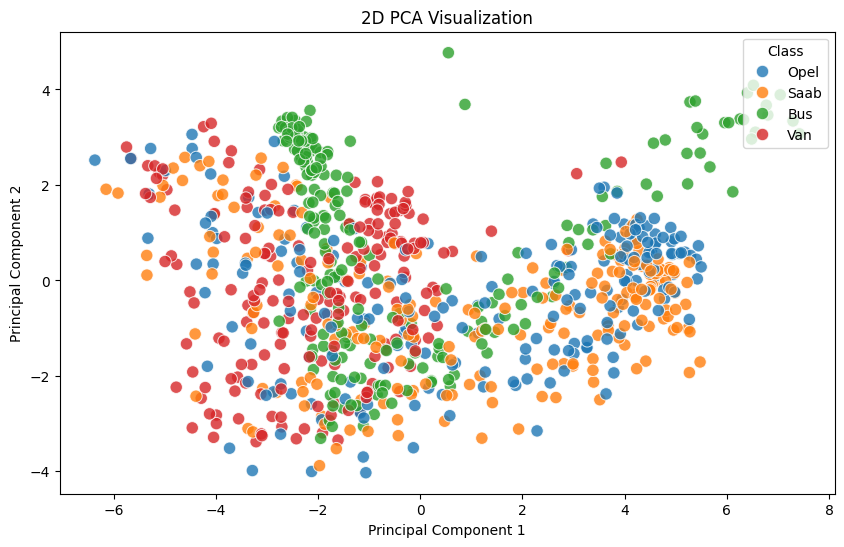

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_pca_2d(principal_components, labels, class_mapping):
    # Create a DataFrame with PCs and original class labels
    pc_df = pd.DataFrame(data=principal_components[:, :2], columns=['PC1', 'PC2'])
    pc_df['Class'] = labels.map(class_mapping)

    # Set a custom color palette for better visibility
    sns.set_palette("tab10")

    # Scatter plot of 2D PCA
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pc_df, palette="tab10", s=80, alpha=0.8)
    plt.title('2D PCA Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Legend with original class labels
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, title='Class', loc='upper right')

    plt.show()

class_mapping = {0: 'Van', 1: 'Bus', 2: 'Saab', 3: 'Opel'}
visualize_pca_2d(principal_components, y, class_mapping)

#### Observations

Groupings:
classes Saab and Opel are always grouped together and overlapping indicating shared characteristics or the PCA may not be suited to seperate these classes.

Transformation:
The bus class has two distinct transformations, a settep, declining transformation from -2 to 0 and a linear increase from -2 to 7

### D

Feature Importances (Loadings):
                              PC1       PC2       PC3       PC4       PC5  \
compactness              0.274857 -0.127688 -0.119023  0.076213  0.065475   
circularity              0.295079  0.129915 -0.030278  0.184450 -0.082055   
distance_circularity     0.304330 -0.075613 -0.055221 -0.069618  0.041953   
radius_ratio             0.267647 -0.188735  0.275139 -0.042708 -0.047136   
pr_axis_aspect_ratio     0.080662 -0.120664  0.642931  0.035616 -0.043770   
max_length_aspect_ratio  0.096756  0.011270  0.592036  0.031330  0.215524   
scatter_ratio            0.316977  0.047136 -0.096402 -0.094855 -0.016901   
elongatedness           -0.313582  0.013346  0.056661  0.083060  0.076404   
pr_axisrectangular       0.313924  0.059963 -0.109162 -0.092279 -0.000015   
lengthrectangular        0.282342  0.115770 -0.017440  0.185440 -0.057124   
majorvariance            0.309390  0.061831  0.056746 -0.116624 -0.000724   
minorvariance            0.314365  0.051653 

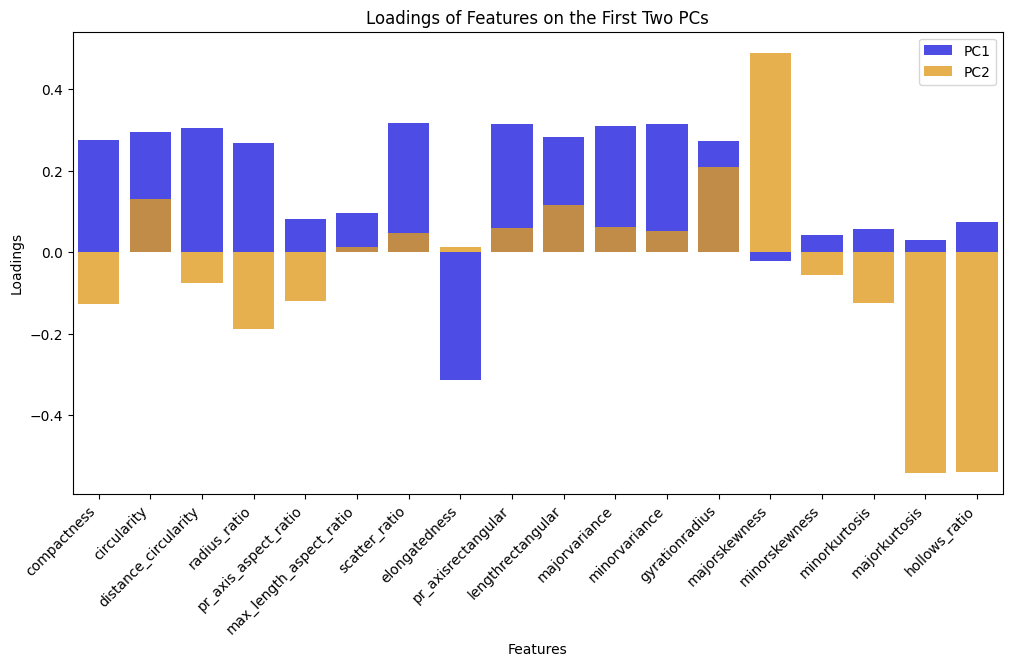

In [51]:
# Load the dataset
vehicles_df = pd.read_csv(file_path)

# Convert class labels to numeric
class_mapping = {"van": 0, "bus": 1, "saab": 2, "opel": 3}
vehicles_df["class"] = vehicles_df["class"].map(class_mapping)

# Separate features and labels
X = vehicles_df.drop(columns=['class'])
y = vehicles_df['class']

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X_standardized)

# Get the loadings (feature importances)
loadings_df = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])], index=X.columns)

# Display feature importances
print("Feature Importances (Loadings):")
print(loadings_df)

def plot_pca_loadings(loadings_df):
    # Plot bar graph for the first two principal components
    plt.figure(figsize=(12, 6))
    sns.barplot(x=loadings_df.index, y=loadings_df['PC1'], color='blue', label='PC1', alpha=0.8)
    sns.barplot(x=loadings_df.index, y=loadings_df['PC2'], color='orange', label='PC2', alpha=0.8)
    
    plt.title('Loadings of Features on the First Two PCs')
    plt.xlabel('Features')
    plt.ylabel('Loadings')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_pca_loadings(loadings_df)

#### Observations

PC1 has more and higher positive loadings, PC1 is more compact and circular and shorter.
PC2 has low radius and hollows ratios but has a high major skewness loading.

## BONUS


Equal Width Discretization:
0    4
1    0
2    4
3    4
4    4
Name: Equal_Width_Bins, dtype: int64

Equal Frequency Discretization:
0    3
1    0
2    4
3    3
4    4
Name: Equal_Frequency_Bins, dtype: int64


/var/folders/9q/yldjq0js2ng8cysrh56tt9xw0000gn/T/ipykernel_36008/3470497249.py:65: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


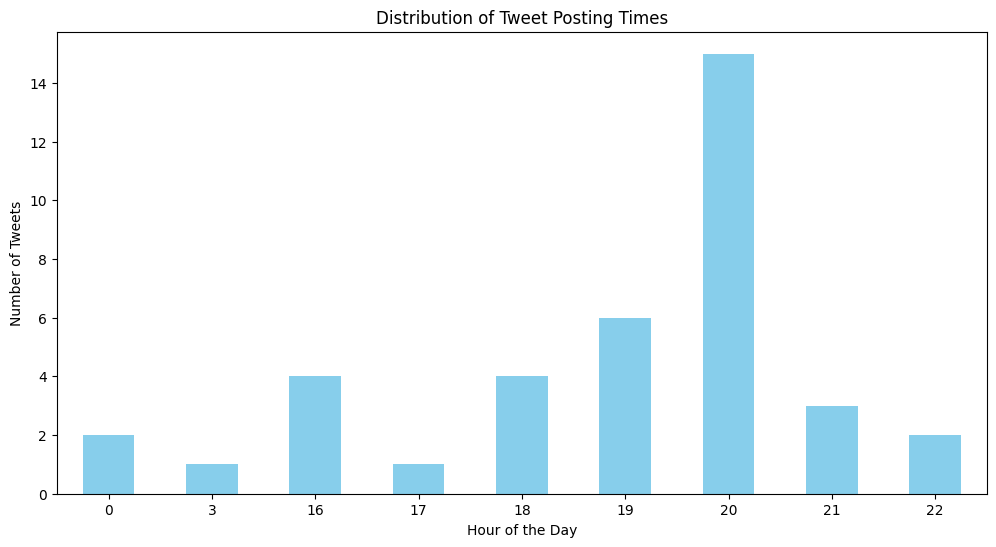

In [69]:
import re
import json

data_list = []

with open('./data/wh.json') as file:
    for line in file:
        try:
            data = json.loads(line)
            data_list.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

df = pd.json_normalize(data_list)

# Extract relevant columns for processing (you may need to adapt based on the actual structure of your data)
selected_columns = ['text', 'created_at']
df = df[selected_columns]

def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def lowercase_tweets(df):
    df['text'] = df['text'].str.lower()

def remove_URLs(df):
    df['text'] = df['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

def remove_User_Mentions(df):
    df['text'] = df['text'].replace(r'@\w+', '', regex=True)

# Apply lowercase_tweets, remove_URLs, and remove_User_Mentions functions
lowercase_tweets(df)
remove_URLs(df)
remove_User_Mentions(df)

# Equal Width Discretization (Binning)
equal_width_bins = pd.cut(df['text'].str.len(), bins=5, labels=False)
df['Equal_Width_Bins'] = equal_width_bins
print("\nEqual Width Discretization:")
print(df['Equal_Width_Bins'].head())

# Equal Frequency Discretization
equal_frequency_bins = pd.qcut(df['text'].str.len(), q=5, labels=False, duplicates='drop')
df['Equal_Frequency_Bins'] = equal_frequency_bins
print("\nEqual Frequency Discretization:")
print(df['Equal_Frequency_Bins'].head())

# Bar chart for time of day each tweet was posted

# Handle missing 'created_at'
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df = df.dropna(subset=['created_at'])

df['hour_of_day'] = df['created_at'].dt.hour

plt.figure(figsize=(12, 6))
df['hour_of_day'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Tweet Posting Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()
